<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [574]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org psycopg2

In [575]:

import pandas as pd
import psycopg2
import matplotlib.pyplot as plt 
import plotly.express as px

In [576]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [577]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 


In [578]:
# текст запроса
query_3_1 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во вакансий в базе"
                FROM vacancies 
'''

In [579]:
query3_1 = pd.read_sql_query(query_3_1, connection)
query3_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/4129198163.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во вакансий в базе
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [580]:
# текст запроса
query_3_2 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во работодателей в базе"
                FROM employers
'''

In [581]:
# результат запроса
query3_2 = pd.read_sql_query(query_3_2, connection)
query3_2

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2946212163.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во работодателей в базе
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [582]:
# текст запроса
query_3_3 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во регионов в базе"
                FROM areas 
'''

In [583]:
# результат запроса
query3_3 = pd.read_sql_query(query_3_3, connection)
query3_3

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2097640896.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во регионов в базе
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [584]:
# текст запроса
query_3_4 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во сфер деятельности в базе"
                FROM industries
'''

In [585]:
# результат запроса
query3_4 = pd.read_sql_query(query_3_4, connection)
query3_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3477885426.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во сфер деятельности в базе
0,294


***

In [586]:
conclusion_3_1 = f'''SELECT 
                    name "Наименование вакансии",
                    count(id) as "Кол-во"
                FROM vacancies 
                GROUP BY 1 
                ORDER BY 2 DESC
'''


In [587]:
conclusion3_1 = pd.read_sql_query(conclusion_3_1, connection)
conclusion3_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2934561888.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Наименование вакансии,Кол-во
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
...,...,...
21218,Генеральный менеджер Проекта,1
21219,Ведущий инженер-программист (1С:УПП),1
21220,Главный специалист IT направления,1
21221,Сотрудник Отдела информационных систем,1


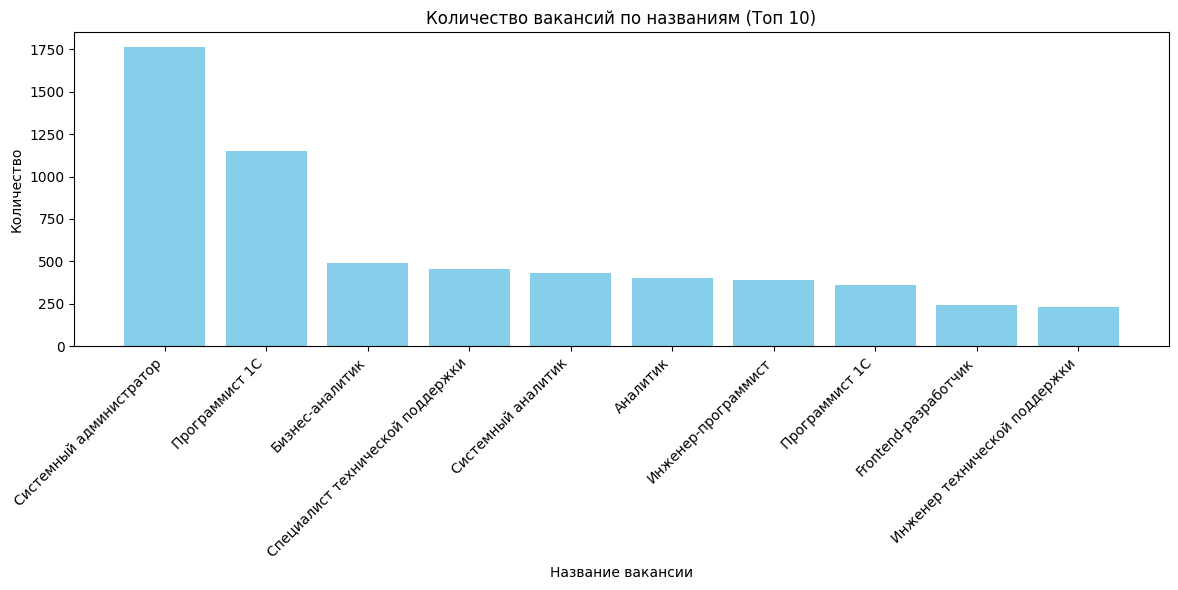

In [588]:
top_jobs = conclusion3_1.head(10)

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))  # Устанавливаем размер диаграммы
plt.bar(top_jobs['Наименование вакансии'], top_jobs['Кол-во'], color='skyblue')  # Столбчатая диаграмма
plt.xlabel('Название вакансии')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.title('Количество вакансий по названиям (Топ 10)')  # Заголовок графика
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для удобства чтения
plt.tight_layout()  # Автоматическая настройка параметров графика
plt.show()  # Отображение диаграммы

In [589]:
conclusion_3_4 = f'''SELECT 
                    i.name "Сферы деятельности",
                    count(ei.employer_id)
                FROM industries i 
                LEFT JOIN employers_industries ei ON i.id = ei.industry_id
                GROUP BY 1 
                ORDER BY 2 DESC
'''
conclusion3_4 = pd.read_sql_query(conclusion_3_4, connection)
conclusion3_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3577589267.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Сферы деятельности,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
...,...,...
289,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
290,Ритуальные услуги,4
291,"Ботанический сад, зоопарк, заповедник",3
292,Автошкола,3


**Предварительный анализ данных. ВЫВОДЫ:**

1. База данных содержит **49,197 различных вакансий**. 
   - Вакансии, связанные с программистами, часто дублируются из-за использования различных языков (например, "Программист 1С"). Это необходимо учесть для обучения моделей, чтобы избежать путаницы. (на графику выше видно, что в топ-10 входит две вакансии "Программист 1С", скорее всего при добавлении в базу использовали букву С на русском и английском языке)

2. В базе данных зарегистрировано **23,501 работодателей**, что говорит о разнообразии и конкурентоспособности рынка труда.

3. **Количество регионов** составляет **1,362**, что позволяет проводить анализ по различным географическим единицам.

4. Большое кол-во компаний в базе связаны с ИТ, онако в базе присутствуют также вакансии, не связанные с ИТ, для машинного обучения эти данные нужно резделить-расформировать. 

Топ-5 сфер деятельности: 
   - Разработка ПО
   - Системная автоматизация
   - Автоматизация бизнес-процессов
   - ИТ и интернет-компании
   - Маркетинговые услуги



Рекомендация: разделить вакансии на категории, связанные с ИТ, и не связанные с ИТ.


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [590]:
# текст запроса
query_4_1 = f'''SELECT 
                    a.name "Регион",
                    count(v.id) as "Кол-во вакансий"
                FROM areas a 
                LEFT JOIN vacancies v ON v.area_id=a.id
                GROUP BY 1 
                ORDER BY 2 DESC
'''

In [591]:
# результат запроса
query4_1 = pd.read_sql_query(query_4_1, connection)
query4_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/653128043.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Регион,Кол-во вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [592]:
# текст запроса
query_4_2 = f'''SELECT 
                    count(id) as "Кол-во вакансий"
                FROM vacancies 
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [593]:
# результат запроса
query4_2 = pd.read_sql_query(query_4_2, connection)
query4_2

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2585065628.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во вакансий
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [594]:
# текст запроса
query_4_3 = f'''SELECT 
                    ROUND(AVG(salary_from)) AS "Средняя нижняя граница зарплаты",
                    ROUND(AVG(salary_to)) AS "Средняя верхняя граница зарплаты"
                FROM vacancies 
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [595]:
# результат запроса
query4_3 = pd.read_sql_query(query_4_3, connection)
query4_3

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1797600360.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Средняя нижняя граница зарплаты,Средняя верхняя граница зарплаты
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [596]:
# текст запроса
query_4_4 = f'''SELECT 
                    count(id) as "Кол-во вакансий", 
                    schedule as "Тип рабочего графика",
                    employment as "Тип трудоустройства"
                FROM vacancies
                GROUP BY 2,3
                ORDER BY 1 DESC
'''

In [597]:
# результат запроса
query4_4 = pd.read_sql_query(query_4_4, connection)
query4_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1072758319.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во вакансий,Тип рабочего графика,Тип трудоустройства
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [601]:
# текст запроса
query_4_5 = f'''SELECT 
                    experience as "Требуемый опыт работы",
                    COUNT(id)
                FROM vacancies
                GROUP BY 1
                ORDER BY 1 
'''

In [602]:
# результат запроса
query4_5 = pd.read_sql_query(query_4_5, connection)
query4_5

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1689560312.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Требуемый опыт работы,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 1 года до 3 лет,26152
3,От 3 до 6 лет,14511


***

In [603]:
conclusion_4_3 = f'''SELECT *
                FROM vacancies 
'''
conclusion4_3 = pd.read_sql_query(conclusion_4_3, connection)
conclusion4_3.isnull().sum ()

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3880998007.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



id                 0
name               0
key_skills      8456
schedule           0
experience         0
employment         0
salary_from    27712
salary_to      36507
area_id            0
employer_id        0
dtype: int64

In [604]:
fig = px.bar(query4_4, x="Тип рабочего графика", y="Кол-во вакансий", color="Тип трудоустройства", title="Тип рабочего графика и тип трудоустройства")
fig.show()


1. Региональная распространенность вакансий.
   - Москва имеет наибольшее количество вакансий, что указывает на высокую концентрацию IT-специалистов и спрос на их услуги в столичном регионе.
   - Санкт-Петербург также показывает значительное количество вакансий, что делает его вторым по популярности регионом для поиска работы в IT.

2. Анализ менее популярных регионов.
   - Регион с наименьшим количеством вакансий (например, Багаевская, Пролетарск и другие) может потребовать дополнительного анализа, чтобы понять, почему количество вакансий там так низко. Возможно, это связано с недостаточным развитием IT-сферы в этих регионах и количества проживающих людей там.

3. **Средняя нижняя граница зарплаты** составляет **71065.0 руб**., **средняя верхняя граница зарплаты** составляет **110537.0 руб**. 

**ВАЖНО** В запросе выше показано количество пустых значений в таблице vacancies. Стоблбец salary_from имеет 27712 пропущенных значений, столбе salary_to имеет 36507 пропущенных значений. Таким образом, можно сделать вывод, что опираться на эти данные нужно только после чательной обработки. 

4. В основном работодатели ищут работников на **полный рабочий день и полную занятость (35,4 тыс. вакансий)** , однако в редких случах можно найти частичную занятость и стажтровку. Самым не популярным типом трудоустройства при работе в полный день является проектная работа. После полного дня идет удаленная работа, где так же преобладает полная занятость (7802 вакансии), однако в данном рабочем графике больше вероятность найти частичную занятость, проектной работы здесь нет. Далее идет гибкий график, сменный график (тут присутствуют вакансии только на полную занятость) и вахтовый метод - самый непопулярный среди всех (насчитывает 367 вакансий на полный день и 2 вакансии на проектную работу). 

5. Самыми не популярными работниками являются те, у которых опыт работы более 6 лет, самыми востребованными - это те, у которых опыт работы от 3 до 6 лет. Я считаю, что такая тендения создалась из-за того, что работники с очень длительным опытом могут иметь какие-либо устаревшие навыки, а те у кого небольшой опыт работы, они еще полны энергией искать новые подходы. 
Новички популярнее тех, что работают более 6 лет, это происходт потому, что у них новый взгляд на рабочие процессы и нестандартное мышление. 



# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [605]:
# текст запроса

In [606]:
# результат запроса

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [607]:
# текст запроса

In [608]:
# результат запроса

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [609]:
# текст запроса

In [610]:
# результат запроса

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [611]:
# текст запроса

In [612]:
# результат запроса

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [613]:
# текст запроса

In [614]:
# результат запроса

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [615]:
# текст запроса

In [616]:
# результат запроса

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [617]:
# код для получения списка городов-милионников

In [618]:
# текст запроса

In [619]:
# результат запроса

***

In [620]:
# выводы по анализу работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [621]:
# текст запроса

In [622]:
# результат запроса

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [623]:
# текст запроса

In [624]:
# результат запроса

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [625]:
# текст запроса

In [626]:
# результат запроса

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [627]:
# текст запроса

In [628]:
# результат запроса

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [629]:
# текст запроса

In [630]:
# результат запроса

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [631]:
# текст запроса

In [632]:
# результат запроса

***

In [633]:
# выводы по предметному анализу

# Общий вывод по проекту

In [634]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования